In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import imutils
from imutils.contours import sort_contours
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split=0.2)
training_set = train_datagen.flow_from_directory('dataset',subset="training",shuffle=True,target_size = (64,64),
                                                 batch_size = 32,class_mode = 'categorical',color_mode="grayscale")

testing_set = train_datagen.flow_from_directory('dataset',subset="validation",shuffle=True,target_size = (64,64),
                                                 batch_size = 32,class_mode = 'categorical',color_mode="grayscale")

Found 7597 images belonging to 17 classes.
Found 1892 images belonging to 17 classes.


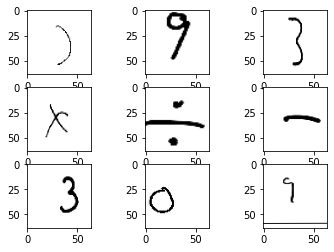

In [3]:
X_train,y_train = training_set.next()
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [4]:
print(training_set.class_indices)

{'(': 0, ')': 1, '0': 2, '1': 3, '2': 4, '3': 5, '4': 6, '5': 7, '6': 8, '7': 9, '8': 10, '9': 11, 'add': 12, 'div1': 13, 'div2': 14, 'mul': 15, 'sub': 16}


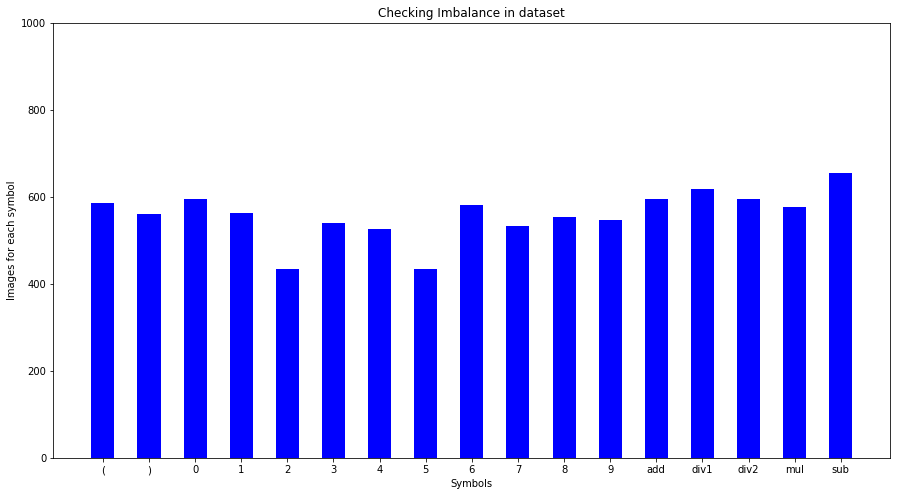

In [5]:
#print(training_set.class_indices)

import os
APP_FOLDER = "dataset"
symbols = []
values = []
for base, dirs, files in os.walk(APP_FOLDER):
    for dirss in dirs:
        symbols.append(dirss)
        list = os.listdir("dataset/"+dirss) # dir is your directory path
        values.append(len(list))




plt.figure(figsize=(15,8))
plt.bar(symbols,values, color ='blue',
        width = 0.5)

plt.xlabel("Symbols")
plt.ylabel("Images for each symbol")
plt.title("Checking Imbalance in dataset")
ax = plt.gca()
ax.set_ylim([0,1000])
plt.show()


In [6]:
cnn = tf.keras.models.Sequential()
#cnn.add(tf.keras.layers.ZeroPadding2D(padding=(2, 2)))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64,64,1]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
#cnn.add(tf.keras.layers.Dense(units=50, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=17, activation='softmax'))
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
hist = cnn.fit(x = training_set,validation_data = testing_set,epochs = 35)

Epoch 1/35
238/238 [==============================] - 89s 373ms/step - loss: 1.5070 - accuracy: 0.5531 - val_loss: 0.8787 - val_accuracy: 0.7384
Epoch 2/35
238/238 [==============================] - 33s 141ms/step - loss: 0.6130 - accuracy: 0.8137 - val_loss: 0.5981 - val_accuracy: 0.8166
Epoch 3/35
238/238 [==============================] - 23s 98ms/step - loss: 0.3749 - accuracy: 0.8828 - val_loss: 0.4460 - val_accuracy: 0.8742
Epoch 4/35
238/238 [==============================] - 21s 89ms/step - loss: 0.2619 - accuracy: 0.9215 - val_loss: 0.3525 - val_accuracy: 0.8911
Epoch 5/35
238/238 [==============================] - 21s 90ms/step - loss: 0.1991 - accuracy: 0.9344 - val_loss: 0.3931 - val_accuracy: 0.8811
Epoch 6/35
238/238 [==============================] - 22s 91ms/step - loss: 0.1602 - accuracy: 0.9467 - val_loss: 0.3361 - val_accuracy: 0.9080
Epoch 7/35
238/238 [==============================] - 22s 91ms/step - loss: 0.1339 - accuracy: 0.9564 - val_loss: 0.3709 - val_accurac

In [7]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 6272)              0

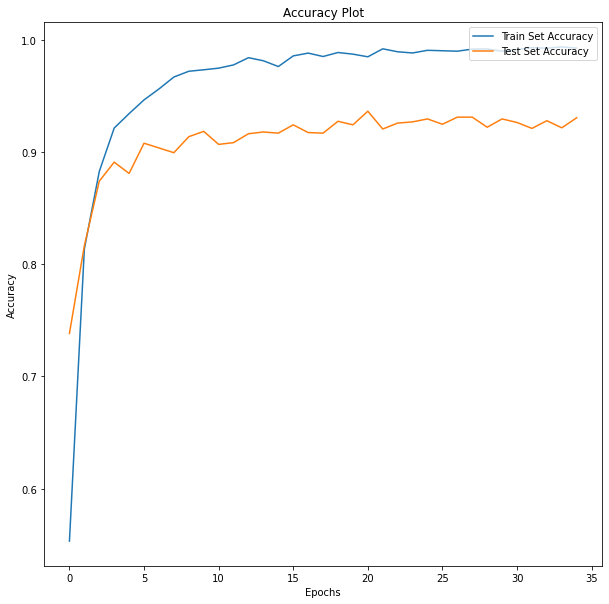

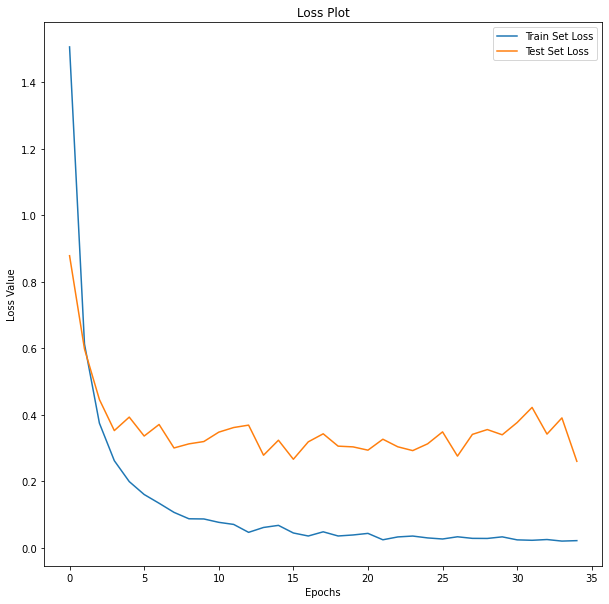

In [8]:
figure = plt.figure(figsize=(10, 10))
plt.plot(hist.history['accuracy'], label='Train Set Accuracy')
plt.plot(hist.history['val_accuracy'], label='Test Set Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

figure2 = plt.figure(figsize=(10, 10))
plt.plot(hist.history['loss'], label='Train Set Loss')
plt.plot(hist.history['val_loss'], label='Test Set Loss')
plt.title('Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend(loc='upper right')
plt.show()

add


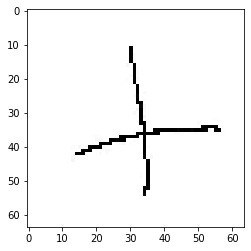

In [13]:
def get_key(val):
    for key, value in training_set.class_indices.items():
         if val == value:
            return key
 
    return "key doesn't exist"

test_image = image.load_img('testing_symbol/plus.jpg',target_size = (64,64),grayscale=True)
plt.imshow(test_image,cmap='gray')
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
print(get_key(np.argmax(result, axis=1)))

Prediction of expression: (200/5)/4
Value of the expression (200/5)/4 : 10.0


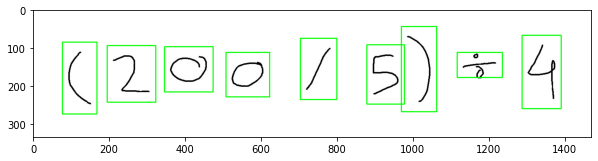

In [21]:
def prediction(img):
    #img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    #plt.imshow(img, cmap = 'gray')
    img = cv2.resize(img,(64,64))
    norm_image = cv2.normalize(img, None, alpha = 0, beta = 1, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    #norm_image=img/255
    norm_image = norm_image.reshape((norm_image.shape[0], norm_image.shape[1], 1))
    case = np.asarray([norm_image])
    pred = cnn.predict([case])
    pred = np.argmax(pred, axis=1)
    return pred

image = cv2.imread('testing_expression/exp2.jpg')
#image = cv2.resize(image,(300,300))
#Converting the image to grayScale for better accuracy(RGB scale might underfit the data).
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#To smoothen the image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# perform edge detection, find contours in the edge map, and sort the
# resulting contours from left-to-right
edged = cv2.Canny(blurred, 120, 50)
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sort_contours(cnts, method="left-to-right")[0]
chars=[]
for c in cnts:
    # compute the bounding box of the contour
    (x, y, w, h) = cv2.boundingRect(c)
    # filter out bounding boxes, ensuring they are neither too small
    # nor too large
    if w*h>300 and (h>60 or w>40):
        # extract the character and threshold it to make the character
        # appear as *white* (foreground) on a *black* background, then
        # grab the width and height of the thresholded image
        
        roi = gray[y-25:y + h+25, x-15:x + w+15]
        chars.append(prediction(roi)[0])
        cv2.rectangle(image, (x-15, y-25), (x + w + 15, y + h+25), (0, 255, 0), 2)
        
plt.figure(figsize=(10,10))
plt.imshow(image)
e = ''
for i in chars:
    if i==0:
        e += '('
    elif i==1:
        e += ')'
    elif i==12:
        e += '+'
    elif i==13 or i==14:
        e += '/'
    elif i==15:
        e+='*'
    elif i==16:
        e+='-'
    else:
        e += str(i-2)
print("Prediction of expression:",e)
try:
    v = eval(e)
    print('Value of the expression {} : {}'.format(e, v))
except:
    print('Please enter valid expression that can be evaluated')

In [22]:
tf.keras.models.save_model(cnn,'my_model')

INFO:tensorflow:Assets written to: my_model\assets


In [23]:
cnn = tf.keras.models.load_model('my_model')